# Принятие решений в бизнесе на основе данных

# Описание проекта

У крупного интернет-магазина есть список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

Наш проект будет состоять из пяти частей:

1. Загрузка и подготовка данных к исследованию
2. Приоритизация гипотез с помощью фреймворков ICE и RICE
3. Анализ A/B-теста:
 Графический анализ
 Статистический анализ
4. Принятие решений
5. Общие выводы

## Загрузка и подготовка данных к исследованию

In [1]:
# импортируем библиотеки
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image # библиотека для отображения картинок

In [2]:
# загружаем исходные датасеты
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'), # гипотезы
        pd.read_csv('/datasets/orders.csv'), # заказы
        pd.read_csv('/datasets/visitors.csv')   # пользователи
    )  
except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'), # гипотезы
        pd.read_csv('orders.csv'), # заказы
        pd.read_csv('visitors.csv')   # пользователи
    )    

# Гипотезы

In [3]:
# Гипотезы
pd.set_option('display.max_colwidth', 0) # чтобы текст гипотез выводился целиком
display(hypothesis.info)

<bound method DataFrame.info of                                                                                                      Hypothesis  \
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
4  Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                               
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
7  Добавить форму подписки на все основные стран

Описание колонок датасета Гипотезы

•	Hypothesis — краткое описание гипотезы;

•	Reach — охват пользователей по 10-балльной шкале;

•	Impact — влияние на пользователей по 10-балльной шкале;

•	Confidence — уверенность в гипотезе по 10-балльной шкале;

•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [4]:
#проверка дубликатов
hypothesis.duplicated().sum()

0

In [5]:
#приведем названия к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
# проверка пропусков в данных
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [6]:
#получим список столбцов
print(hypothesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


In [7]:
#посмотрим заголовок
hypothesis.head(9)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [8]:
# вывести текст гипотез целиком 
print(hypothesis['hypothesis'].sort_values().unique())
#print(hypothesis.info())

['Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов'
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
 'Запустить акцию, дающую скидку на товар в день рождения'
 'Запустить собственную службу доставки, что сократит срок доставки заказов'
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию']


# Заказы 

• transactionId — идентификатор заказа;

• visitorId — идентификатор пользователя, совершившего заказ;

• date — дата, когда был совершён заказ;

• revenue — выручка заказа;

• group — группа A/B-теста, в которую попал заказ.

In [9]:
# Заказы
display(orders.info)

<bound method DataFrame.info of       transactionId   visitorId        date  revenue group
0     3667963787     3312258926  2019-08-15  1650     B   
1     2804400009     3642806036  2019-08-15  730      B   
2     2961555356     4069496402  2019-08-15  400      A   
3     3797467345     1196621759  2019-08-15  9759     B   
4     2282983706     2322279887  2019-08-15  2308     B   
...          ...            ...         ...   ...    ..   
1192  2662137336     3733762160  2019-08-14  6490     B   
1193  2203539145     370388673   2019-08-14  3190     A   
1194  1807773912     573423106   2019-08-14  10550    A   
1195  1947021204     1614305549  2019-08-14  100      A   
1196  3936777065     2108080724  2019-08-15  202740   B   

[1197 rows x 5 columns]>

In [10]:
#проверка дубликатов
orders.duplicated().sum()

0

In [11]:
#приведем названия к нижнему регистру
orders.columns = orders.columns.str.lower()
# проверка пропусков в данных
orders.isna().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
#получим список столбцов
print(orders.columns)

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')


In [13]:
#заменим названия столбцов
cols = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders.set_axis(cols, axis='columns', inplace=True)
#посмотрим заголовок
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
# преобразование данных о времени
pd.to_datetime(orders['date']).dt.date.astype('datetime64[ns]') 
# orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

0      2019-08-15
1      2019-08-15
2      2019-08-15
3      2019-08-15
4      2019-08-15
          ...    
1192   2019-08-14
1193   2019-08-14
1194   2019-08-14
1195   2019-08-14
1196   2019-08-15
Name: date, Length: 1197, dtype: datetime64[ns]

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [16]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [18]:
# выведем статистику
orders.describe()

,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [19]:
# проверим на наличие покупателей, которые попали в обе группы
orders_a_gr = orders.query('group == "A"')
orders_b_gr = orders.query('group == "B"')

orders_dubl_id = orders_a_gr.merge(orders_b_gr, on='visitor_id')['visitor_id'].unique()

In [20]:
print(f'Количество покупателей, которые попали в обе группы: {len(orders_dubl_id)}')
print(f'Доля таких покупатеолей от общего числа: {round(len(orders_dubl_id) / len(orders["visitor_id"].unique()) * 100, 2)} %')

Количество покупателей, которые попали в обе группы: 58
Доля таких покупатеолей от общего числа: 5.63 %


В датасете присутствует 58 покупателей, которые попали в обе тестируемые группы. Такие пересечения могут негативно повлиять на анализ теста. Доля таких пользователей 5.6 % от общего числа покупателей, поэтому считаем возможным исключить их из выборки.

In [21]:
orders = orders.query('visitor_id not in @orders_dubl_id')

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


# Пользователи

In [23]:
#пользователи
print(visitors.info)
visitors.info()

<bound method DataFrame.info of           date group  visitors
0   2019-08-01  A     719     
1   2019-08-02  A     619     
2   2019-08-03  A     507     
3   2019-08-04  A     717     
4   2019-08-05  A     756     
..         ... ..     ...     
57  2019-08-27  B     720     
58  2019-08-28  B     654     
59  2019-08-29  B     531     
60  2019-08-30  B     490     
61  2019-08-31  B     718     

[62 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


•	date — дата;

•	group — группа A/B-теста;

•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [24]:
#проверка дубликатов
visitors.duplicated().sum()

0

In [25]:
visitors.columns = visitors.columns.str.lower()

In [26]:
# проверка пропусков в данных
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [27]:
#получим список столбцов
print(visitors.columns)

Index(['date', 'group', 'visitors'], dtype='object')


In [28]:
# преобразование данных о времени ?? 
pd.to_datetime(visitors['date']).dt.date 
# visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

0     2019-08-01
1     2019-08-02
2     2019-08-03
3     2019-08-04
4     2019-08-05
         ...    
57    2019-08-27
58    2019-08-28
59    2019-08-29
60    2019-08-30
61    2019-08-31
Name: date, Length: 62, dtype: object

In [29]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [30]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [31]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [32]:
# проверим какие группы есть
print(visitors['group'].sort_values().unique())

['A' 'B']


In [33]:
# выведем статистику
visitors['visitors'].describe()

count    62.000000 
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

# Выводы по разделу Загрузка и подготовка данных к исследованию 
Выполнили предобработку. В данных нет дубликатов и пропусков. Типы данных во всех колонках соответствуют сохранённым в них значениям. Столбцы с датой преобразованы.

В датасете Пользователи соответствуют только двум группа А и В, как заявлено. 

Необходимо проверка корректности разбиения покупателей на группы.

Артефактов в числовых показателях нет.

Самая большая выручка по заказу составляет 1.294.500, минимальная равняется 50.

В среднем на дату посещения приходится 607 посетителей. Самый низкий показатель 361 человек, самый высокий 770 посетителей на одну дату посещения.


## Приоритизация гипотез с помощью фреймворков ICE и RICE

В файле /datasets/hypothesis.csv - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Этапы приоритизации:

•	Применим фреймворк ICE для приоритизации гипотез.

•	Применим фреймворк RICE для приоритизации гипотез. 

•	Проанализируем, как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [34]:
# посчитаем ICE
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 1)
#hypothesis['ICE'] = hypothesis['ICE'].round(1) округление 
#hypothesis['ICE'].style.format("{:,.2%}") формат таблицы
display(hypothesis[['hypothesis' , 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Наиболее перспективными гипотезами по **ICE** являются:

№8. Запустить акцию, дающую скидку на товар в день рождения

№0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

№7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

In [35]:
# посчитаем RICE
hypothesis['RICE'] =(
    (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
)

display(hypothesis[['hypothesis' , 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективными гипотезами по **RICE** являются:

№7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

№2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

№0. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

№6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	


**Выводы по приоритизации гипотез**

При применении RICE вместо ICE, наиболее приоритетная гипотеза № 8 (Запустить акцию, дающую скидку на товар в день рождения) по фреймворку ICE стала менее приоритетной и занимает только пятое место по приоритету. 

Это связано с тем, что скидка на товар в день рождения затронет маленькое количество посетителей. Компонент `Reach` по данной гипотезе имеет самый низкий уровень значимости в 1 балл. 

Соответственно исходя из формул расчета фреймворков:

$$ICE = \frac{Impact * Confidence}{Efforts}$$


$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

соответствующие изменения в приоритезации гипотез.

**В пересечении двух фреймворков приоритетными остаются гипотезы:**

№7.  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

№0.  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

№6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

## Анализ A/B-теста

### График кумулятивной выручки по группам 

In [36]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = (
    dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
                .sort_values(by=['date','group'])
)
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = (
    dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
              .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
              .sort_values(by=['date','group'])
)
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_data.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


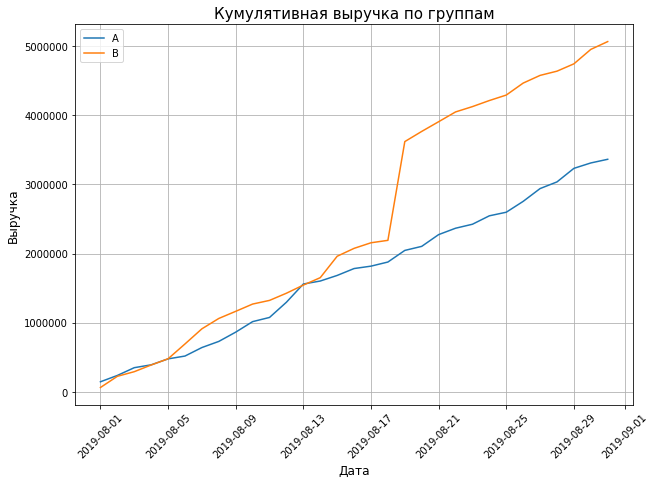

In [37]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 7))
plt.ticklabel_format(style='plain')

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

# Настроим график
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Кумулятивная выручка по группам', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.legend();

Кумулятивная выручка увеличивается в течение всего теста. Однако график выручки группы В за дату между 17 и 21 августа резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека по группам

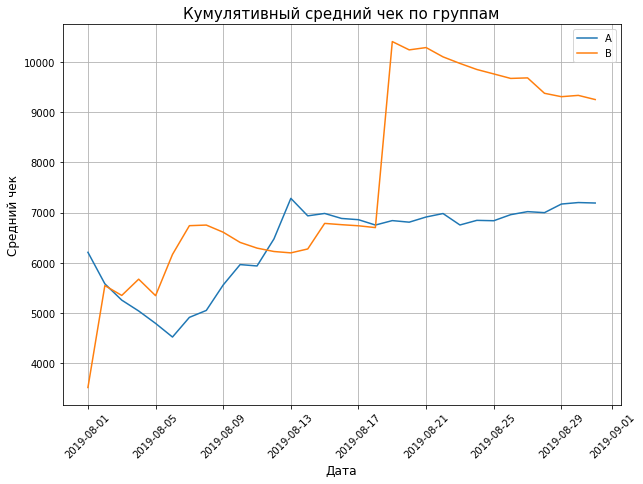

In [38]:
plt.figure(figsize=(10, 7))


# Строим график среднего чека группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')

# Строим график среднего чека группы В
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

# Настроим график
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Кумулятивный средний чек по группам', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек', fontsize=12)
plt.legend();

График среднего чека растет, но мы видим резкие изменения. В группу А видимо вначале теста попали крупные заказы, но потом рост с 13 августа стабилизаируется. По группе В наблюдается резкий скачек во второй половине августа. Не наблюдается равномернсоть среднего чека между группами нужно больше данных, чтобы прийти к реальному среднему чеку и установиться. 

### График относительного изменения кумулятивного среднего чека группы B к группе A

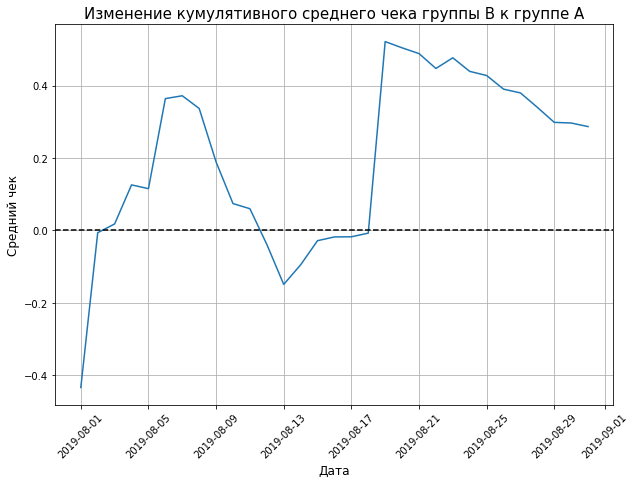

In [39]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = (
    cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

plt.figure(figsize=(10, 7))
# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# Настроим график
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Изменение кумулятивного среднего чека группы B к группе A', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек', fontsize=12)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко скачет. В данных присутствуют аномальные значения выручки.

### График кумулятивного среднего количества заказов на посетителя по группам (конверсия)

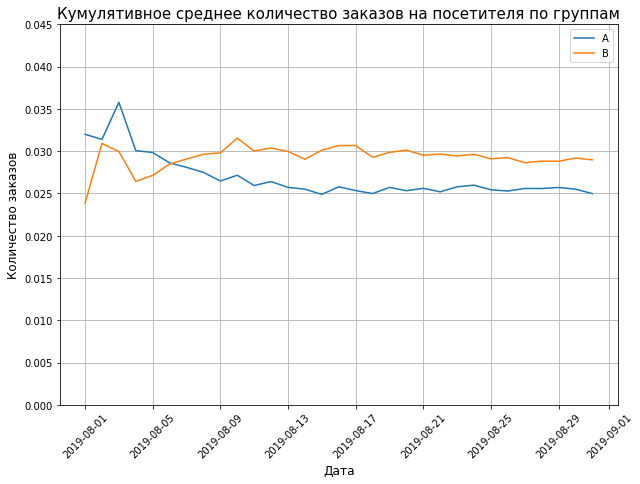

In [40]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(10, 7))
# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

# настроим график
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Кумулятивное среднее количество заказов на посетителя по группам', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.legend()
plt.ylim([0, 0.045]) ;

Кумулятивное среднее количество заказов на посетителя группы В вырвалась вперёд и зафиксировалась, а кумулятивное среднее количество заказов на посетителя группы А просела и также зафиксировалась.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

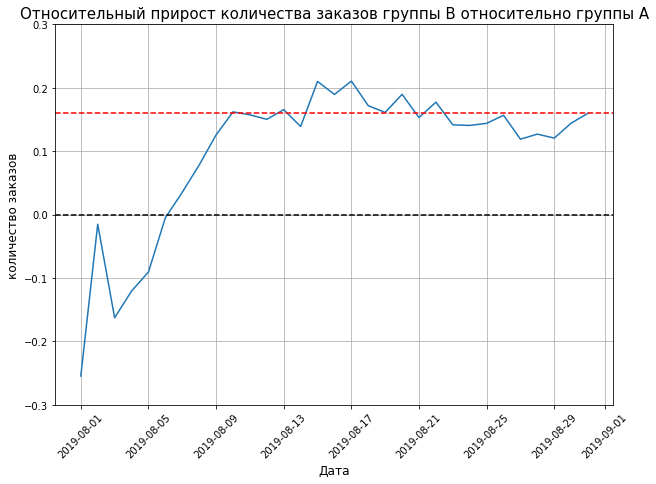

In [41]:
merged_cumulative_conversions = (
    cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

# строим график
plt.figure(figsize=(10, 7))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)


# настроим график
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Относительный прирост количества заказов группы B относительно группы A', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('количество заказов', fontsize=12)
plt.ylim([-0.3, 0.3]) ;
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='red', linestyle='--');

In [42]:
cumulative_data_a

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
2,2019-08-02,A,42,36,234381,1338,0.031390
4,2019-08-03,A,66,60,346854,1845,0.035772
6,2019-08-04,A,77,71,388030,2562,0.030055
8,2019-08-05,A,99,92,474413,3318,0.029837
10,2019-08-06,A,114,104,515332,3985,0.028607
12,2019-08-07,A,130,120,638580,4629,0.028084
14,2019-08-08,A,144,133,727219,5239,0.027486
16,2019-08-09,A,155,143,861456,5856,0.026469
18,2019-08-10,A,170,158,1013731,6262,0.027148


На 6 день начала теста количество заказов группы В начинает превосходить количество заказов группы А, и к концу теста на 16% больше. В целом судя по графикам отношение количества заказов ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.

### Точечный график количества заказов по пользователям

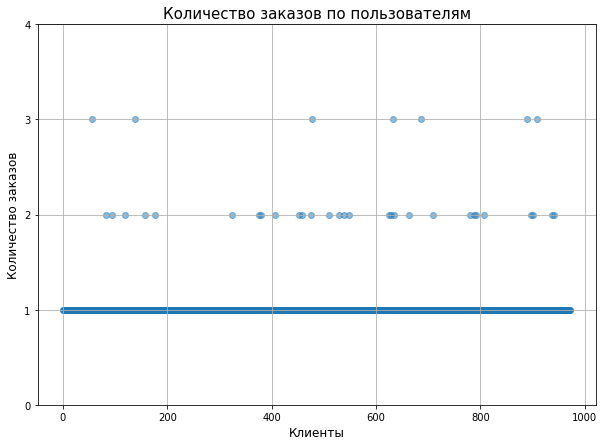

In [43]:
# сгруппируем заказы по покупателям
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']

# строим график
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.5)
plt.grid(True)
plt.title('Количество заказов по пользователям', fontsize=15)
plt.xlabel('Клиенты', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.yticks(np.arange(0, 5, step=1));

Большинство покупателей заказывали только один раз. Однако есть покупатели которые заказывали 2 и 4 раза. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### 95-й и 99-й перцентили количества заказов на пользователя

In [44]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
np.percentile(orders_by_users['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказ. Разумно выбрать не больше 1 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных покупателей (покупателей кто делал заказ больше одного раза).

### Точечный график стоимостей заказов

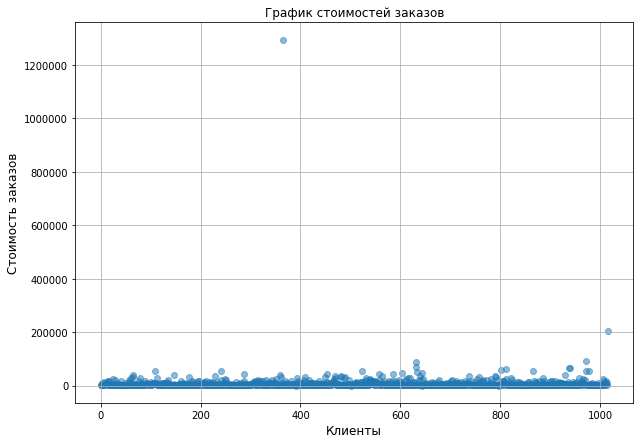

In [45]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# строим график
plt.figure(figsize=(10,7))
plt.ticklabel_format(style='plain')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.grid(True)
plt.title('График стоимостей заказов')
plt.xlabel('Клиенты', fontsize=12)
plt.ylabel('Стоимость заказов', fontsize=12);

Необходим более наглядный график, так как из-за явного выброса масштаб не детальный.

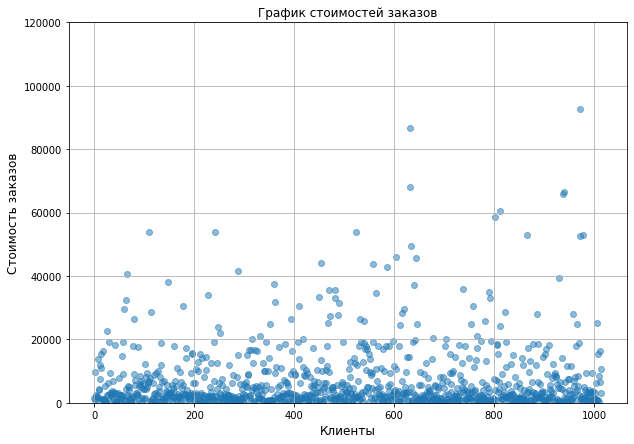

In [46]:
# строим график
plt.figure(figsize=(10,7))
plt.ticklabel_format(style='plain')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.grid(True)
plt.title('График стоимостей заказов')
plt.xlabel('Клиенты', fontsize=12)
plt.ylabel('Стоимость заказов', fontsize=12);
plt.ylim([0, 120000]);

<div class="alert alert-info">
<b> вывод</b>

Когда мы построили график стоимости заказов в пределах до 120 тысяч, стало видно явно частотное распределение заказов как по стоимости, так и по количеству клиентов. От 80 тысяч до 100 тысяч у нас всего два заказа, но с количеством клиентов более 600. От 60 до 80 - четыре и тоже с количеством клиентов более 600. Далее, чем ниже стоимость заказа, тем заказов становится все больше, а вот количество клиентов распределяется в разных диапазонах от 0 до 1000 практически равномерно. 
</div>

### 95-й и 99-й перцентили стоимости заказов

In [47]:
# посчитаем выборочные перцентили стоимости заказов
print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


5% заказов имеют чек на сумму дороже 26785. 10% заказов имеют чек на сумму не больше чем 17990 и у 1% заказов чек более чем на сумму 53904. Выберем за верхнюю границу заказ на сумму не более чем 27000 и отсеем аномальные значения по ней.

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

Мы оценили результаты A/B-теста визуально и выяснили что в данных есть выбросы;
Увидели выбросы и нашли границу для их определения.
Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным — без удаления аномальных посетителей, используя непараметрический тест Уилкоксона-Манна-Уитни. 

За критический уровень статистической значимости возьмем значение = 0.05 %.

Сформулируем гипотезы:

H0: Нулевая: различий в среднем количестве заказов между группами нет.
H1: Альтернативная: различия в среднем количестве заказов между группами есть.

In [48]:
# начнём с подготовки данных.
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

названия столбцов данных:
- `date` — дата;
- `orders_per_date_a` — количество заказов в выбранную дату в группе A;
- `revenue_per_date_a` — суммарная выручка в выбранную дату в группе A;
- `orders_per_date_b` — количество заказов в выбранную дату в группе B;
- `revenue_per_date_b` — суммарная выручка в выбранную дату в группе B;
- `orders_cummulative_a` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenue_cummulative_a` — суммарная выручка до выбранной даты включительно в группе A;
- `orders_cummulative_b` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenue_cummulative_b` — суммарная выручка до выбранной даты включительно в группе B;
- `visitors_per_date_a` — количество пользователей в выбранную дату в группе A;
- `visitors_per_date_b` — количество пользователей в выбранную дату в группе B;
- `visitors_cummulative_a` — количество пользователей до выбранной даты включительно в группе A;
- `visitors_cummulative_b` — количество пользователей до выбранной даты включительно в группе B.

### Посчитаем статистическую значимость различия среднем количестве заказов на посетителя между группами по «сырым» данным.

In [49]:
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [50]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print(f'P-value: {st.mannwhitneyu(sampleA, sampleB)[1]:.3}')

print(f"Относительное изменение количества заказов: {sampleB.mean() / sampleA.mean() - 1:.1%}")

P-value: 0.011
Относительное изменение количества заказов: 16.0%


P-value = 0.01 - меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ сырых данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего количества заказов на посетителя в группе В к группе А равен 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным используя непараметрический тест Уилкоксона-Манна-Уитни. За критический уровень статистической значимости возьмем значение = 0.05 %.

Сформулируем гипотезы:

H0: Нулевая: различий в среднем чеке между группами нет.

H1: Альтернативная: различия в среднем чеке между группами есть.

In [51]:
# передадим критерию mannwhitneyu() данные о выручке с заказов
print('P-value:', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное изменение в среднем чеке:', '{0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительное изменение в среднем чеке: 28.7%


P-value = 0.829, что значительно больше 0.05. Значит, нет причин отвергать нулевую гипотезу и различий в среднем чеке заказа между группами А и В нет. Превышение среднего чека группы B на 28.7% является скорее всего случайностью. 

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

В соответствии с отмеченными аномальными значениями количества и стоимости заказов посмотрим как изменится статистические значимости различий без них.

In [52]:
# вычленим покупателей с аномальными значениями
#REVENUE_THRESHOLD = orders['revenue'].quantile(0.99)
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 1]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > orders['revenue'].quantile(0.99)]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [53]:
# очистим данные от аномальных покупателей 
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

### Проверим статистическую значимость различий в среднем количестве заказа между группами по «очищенным» данным.

In [56]:
print('P-value:', '{0:.3f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительное изменение количества заказов: ', '{0:.1%}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

P-value: 0.008
Относительное изменение количества заказов:  18.8%


Как и в случае с сырыми данными, в среднем количестве заказов между группами есть статистически значимые различия. Группа В лучше по приросту среднего количества заказов на посетителя чем группа А на 18.8% (было 16%)

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Проверим статистическую значимость различий по среднему чеку между группами используя очищенные данные.

In [55]:
print('P-value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное изменение в среднем чеке:', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.969
Относительное изменение в среднем чеке: 0.002


P-value = 0.969, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке заказа между группами по «очищенным» данным есть различия, нельзя, но стоит отметить, что средний чек группы B по сырым данным был значительно выше среднего чека группы A, а именно на 28.7%, тогда как после того как убрали аномальные значения средний чек не сильно отличается от среднего чека группы А (0.2 %). Это огромная разница говорит о том, что в группе В содержались покупатели с огромными чеками, что дал такой скачок.

## Принятие решений

**Имеющиеся факты:**
- Есть статистически значимые различия по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий. Группа В лучше по приросту среднего количества заказов на посетителя чем группа А на 18.8% по очищенным данным (было по "сырым" 16%);


- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Средний чек группы B по сырым данным был значительно выше среднего чека группы A, а именно на 28.7%, тогда как после того как убрали аномальные значения средний чек не сильно отличается от среднего чека группы А (0.2 %);


- График различия количества заказов между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

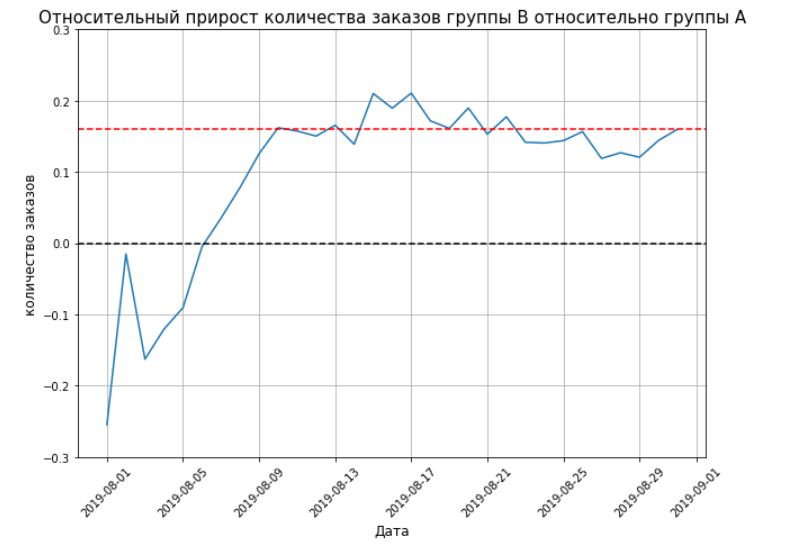

- График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.
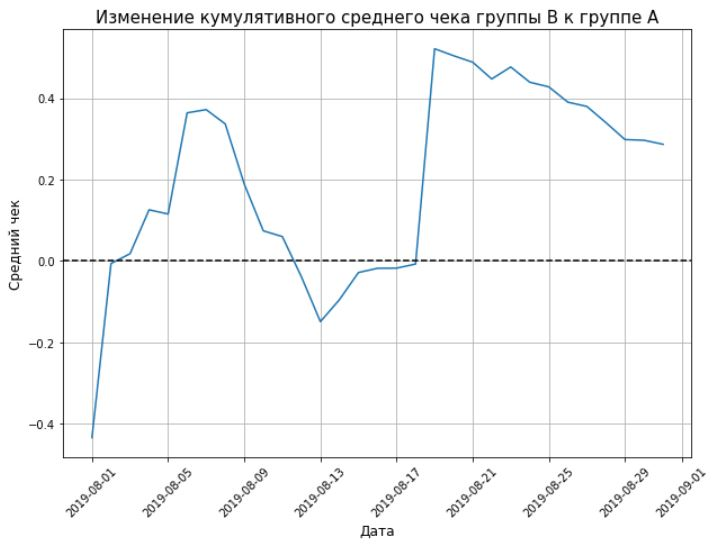


- **Исходя из обнаруженных фактов, тест следует остановить и признать успешным. Продолжать тест смысла нет - так как группа В лучше группы А только по количеству заказов. По приросту среднего чека группы примерно равны.**

## Общие выводы

В данном проекте проведен анализ выручки интернет-магазина и списка гипотез для увеличения выручки, предоставленных отделом маркетинга.
Исходные данные проверили на наличие дубликатов и пропусков и провели предобработку для проведения теста.

Из девяти представленных гипотез выделили приоритетные:

№7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

№0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

№6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Построили графики изменений средних чеков, количества и стоимости заказов как по полной выборке, так и 
с удалением аномальных значений, составляющих 1 % от всего объема данных.

По результатам анализа данных А/В-теста признали проведение теста успешным. 
